## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

D:\ProgramData\anaconda3\envs\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3, 3), padding='same',input_shape=(32,32,3)))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(64, kernel_size=(3, 3), padding='same'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=100)) #output_dim=100,activation=relu
classifier.add(Activation('relu'))
#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))
classifier.summary()

W1214 11:20:52.403241 21696 deprecation_wrapper.py:119] From D:\ProgramData\anaconda3\envs\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 64)        0         
__________

D:\ProgramData\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [6]:
#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=100)

W1214 11:20:59.007211 21696 deprecation_wrapper.py:119] From D:\ProgramData\anaconda3\envs\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1214 11:20:59.300902 21696 deprecation.py:323] From D:\ProgramData\anaconda3\envs\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
50000/50000 [==============================] - 17s 347us/step - loss: 1.6334 - acc: 0.4010
Epoch 2/100
50000/50000 [==============================] - 12s 231us/step - loss: 1.1101 - acc: 0.5960
Epoch 3/100
50000/50000 [==============================] - 12s 238us/step - loss: 0.9802 - acc: 0.6475
Epoch 4/100
50000/50000 [==============================] - 12s 234us/step - loss: 0.8918 - acc: 0.6821
Epoch 5/100
50000/50000 [==============================] - 12s 234us/step - loss: 0.8322 - acc: 0.70341s - loss
Epoch 6/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.7616 - acc: 0.7288
Epoch 7/100
50000/50000 [==============================] - 12s 239us/step - loss: 0.7177 - acc: 0.7442
Epoch 8/100
50000/50000 [==============================] - 12s 249us/step - loss: 0.6630 - acc: 0.7643
Epoch 9/100
50000/50000 [==============================] - 13s 251us/step - loss: 0.6186 - acc: 0.7806
Epoch 10/100
50000/50000 [==============================] - 12s 

50000/50000 [==============================] - 11s 222us/step - loss: 0.0475 - acc: 0.9837
Epoch 80/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0367 - acc: 0.9880
Epoch 81/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0520 - acc: 0.9824
Epoch 82/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.0424 - acc: 0.9856
Epoch 83/100
50000/50000 [==============================] - ETA: 0s - loss: 0.0350 - acc: 0.988 - 11s 223us/step - loss: 0.0350 - acc: 0.9886
Epoch 84/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.0432 - acc: 0.9855
Epoch 85/100
50000/50000 [==============================] - 11s 224us/step - loss: 0.0464 - acc: 0.9841
Epoch 86/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.0401 - acc: 0.9866
Epoch 87/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.0335 - acc: 0.9886
Epoch 88/100
50000/50000 [=============

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [7]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[1.7125222e-03, 5.1856805e-08, 2.6365907e-03, 9.2655325e-01,
        6.8370879e-02, 5.6222235e-11, 5.2109122e-04, 1.3430668e-21,
        2.0555539e-04, 1.0867586e-18]], dtype=float32)

In [16]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=',prediction='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()   

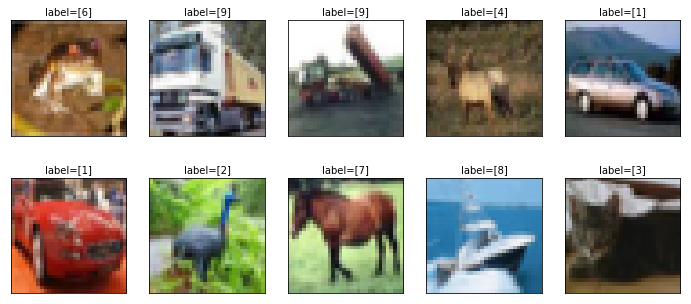

In [19]:
plot_images_labels_prediction(x_train,y_train,[],0)